In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
df = pd.read_csv(r'../data/comparison_all.csv')
df['pro_score'] = np.abs(df['pro_score'])
df['diff'] = df['fragility1']-df['fragility2']

In [47]:
df_top = df.sort_values('pro_score',ascending=True).head(5)

In [48]:
def GroupIt(df):
    fragility = np.hstack((df['fragility1'],df['fragility2']))
    EPI = np.hstack((df['EPI1'],df['EPI2']))
    FSI = np.hstack((df['FSI1'],df['FSI2']))
    group = np.hstack((['treated']*len(df['EPI1']), 
                  ['untreated']*len(df['EPI2'])))
    country = np.hstack((df['country1'],df['country1']))
    

    df_grouped = pd.DataFrame(data={
        'EPI':EPI,
        'FSI':FSI,
        'Group':group,
        'Fragility':fragility,
        'Country': country
    })
    return df_grouped

In [112]:

from matplotlib.colors import ListedColormap

pal = sns.color_palette("GnBu", 3)
cmap = ListedColormap(sns.color_palette("GnBu", 3).as_hex())
rcmap = ListedColormap(sns.color_palette("GnBu_r", 3).as_hex())

In [241]:
pal

[(0.79889273356401391, 0.92113802383698573, 0.77205690119184933),
 (0.47958477508650521, 0.79846212995001931, 0.76955017301038064),
 (0.16539792387543253, 0.5456978085351788, 0.74343713956170709)]

In [50]:
df_grouped = GroupIt(df)

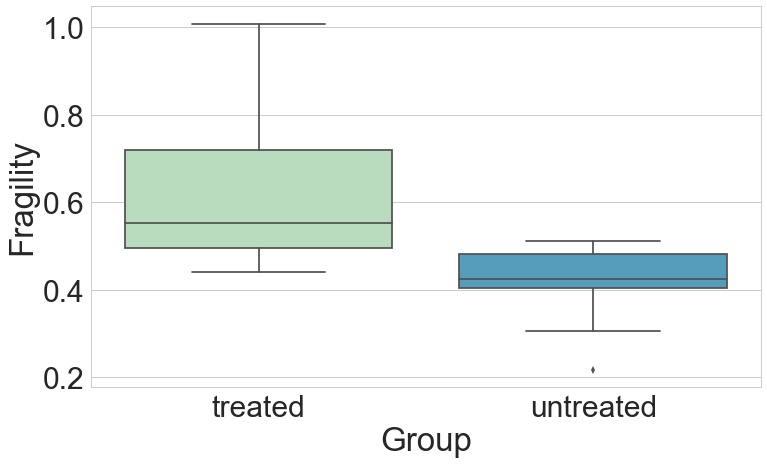

In [83]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid", font_scale=3)
ax = sns.boxplot(x="Group", y='Fragility', data=df_grouped, palette="GnBu")
plt.savefig('../Paper/figs/fragility_treat.pdf',bbox_inches='tight')
plt.show()

In [77]:
df_top = df.sort_values('pro_score',ascending=True).head(8)
df_top['fragility1'] = df_top['fragility2']
df_top['fragility2'] = df_top['diff']
df_top_grouped = GroupIt(df_top)

In [78]:
df_top_grouped

,Country,EPI,FSI,Fragility,Group
0,Iran2014,64.82,87.2,0.420020,treated
1,Ghana2008,54.66,64.6,0.217833,treated
2,India2013,53.74,77.5,0.378641,treated
3,Bhutan2012,61.84,82.4,0.447629,treated
4,Uzbekistan2015,64.88,85.3,0.407984,treated
5,Ecuador2009,68.08,81.2,0.447629,treated
6,Mali2007,38.32,75.5,0.506500,treated
7,Russia2016,83.52,81.0,0.512236,treated
8,Iran2014,63.33,79.2,0.215301,untreated
9,Ghana2008,76.46,67.4,0.469167,untreated


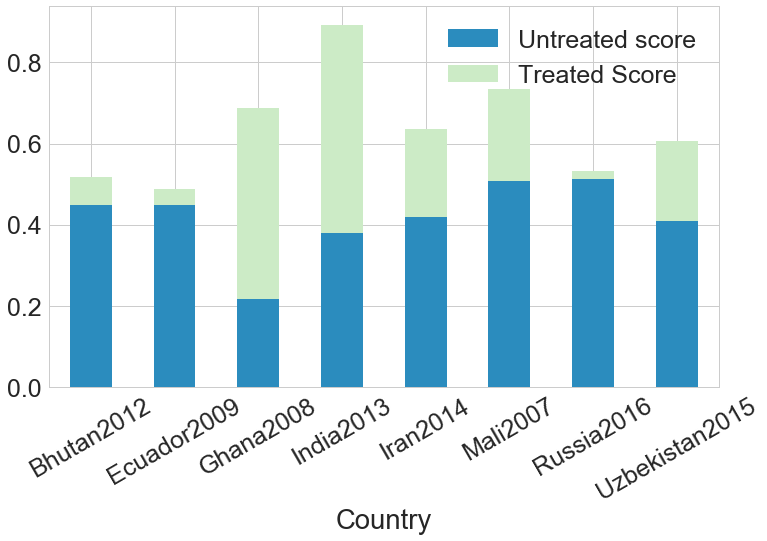

In [85]:
sns.set(style='whitegrid',font_scale=2.5)
df_top_grouped.pivot('Country','Group')['Fragility'].plot(figsize=(12,7),kind='bar',stacked='True', colormap=rcmap, rot=30)
plt.legend(['Untreated score','Treated Score'],fancybox=True, framealpha=1,shadow=True)
plt.savefig('../Paper/figs/compare_score.pdf',bbox_inches='tight')
plt.show()

In [80]:
pivoted = df_top_grouped.pivot('Country','Group')
pivoted.loc['Fragility','treated'] = df_top['diff']

In [89]:
df_frag = pd.read_csv('../Data/fragile.csv')
df_frag.head(3)

,Unnamed: 0,EPI,FSI,country,fragile
0,0,37.74,107.3,Afghanistan,0.966531
1,1,65.46,60.5,Albania,0.582212
2,2,57.18,76.8,Algeria,0.895586


In [105]:
markeredgewidth=2
markersize=12

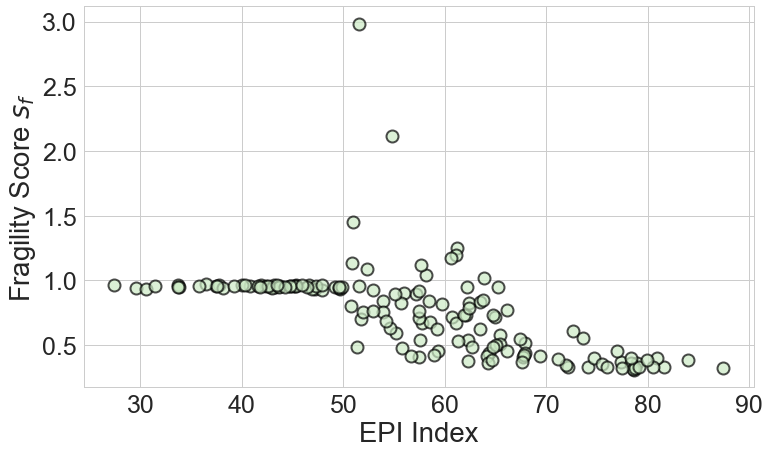

In [128]:
plt.figure(figsize=(12,7))
plt.plot(df_frag['EPI'],df_frag['fragile'],'o',c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('EPI Index')
plt.ylabel(r'Fragility Score $s_f$')
plt.savefig('epifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/epifs.pdf',bbox_inches='tight')
plt.show()

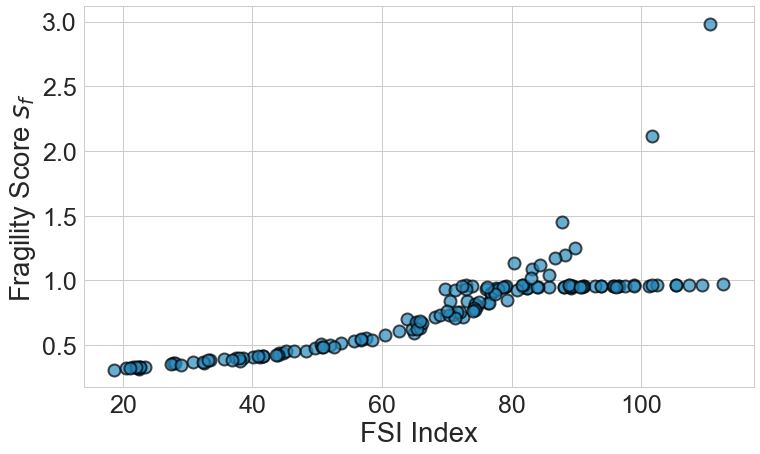

In [129]:
plt.figure(figsize=(12,7))
plt.plot(df_frag['FSI'],df_frag['fragile'],'o', c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('FSI Index')
plt.ylabel(r'Fragility Score $s_f$')
plt.savefig('fsifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/fsifs.pdf',bbox_inches='tight')
plt.show()

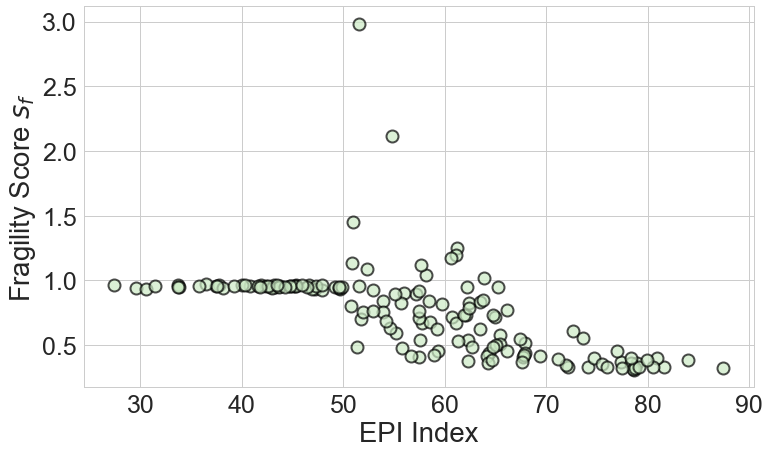

In [130]:
plt.figure(figsize=(12,7))
plt.plot(df_frag['EPI'],df_frag['fragile'],'o',c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('EPI Index')
plt.ylabel(r'Fragility Score $s_f$')
plt.savefig('epifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/epifs.pdf',bbox_inches='tight')
plt.show()

In [126]:
data=pd.read_csv('../Data/fragile.csv')
data.head(3)

,Unnamed: 0,EPI,FSI,country,fragile
0,0,37.74,107.3,Afghanistan,0.966531
1,1,65.46,60.5,Albania,0.582212
2,2,57.18,76.8,Algeria,0.895586


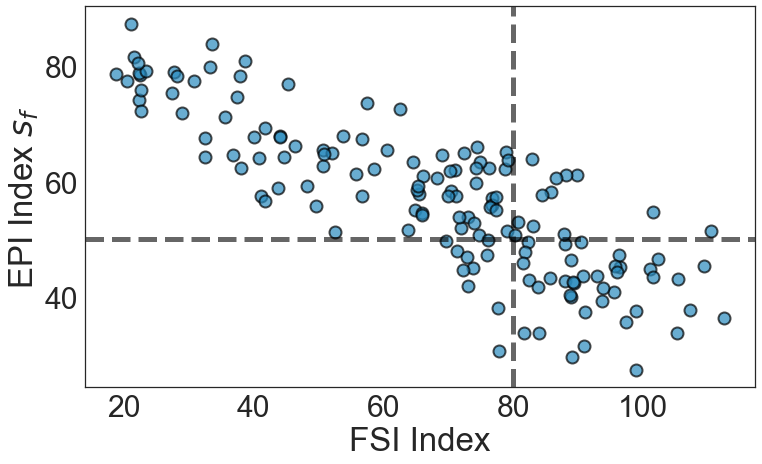

In [149]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)
plt.plot(data['FSI'],data['EPI'],'o', c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=.7)
plt.xlabel('FSI Index')
plt.ylabel(r'EPI Index $s_f$')
plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.savefig('fsifs.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/fsiepi.pdf',bbox_inches='tight')
plt.show()

In [242]:
epi_future = pd.read_csv('../Code/EPI_future.csv')
tradeoff = pd.read_csv('../Code/tradeoff.csv')
gdp_growth_future = pd.read_csv('../Code/gdp_growth_future.csv')

In [243]:
years = epi_future['years']

In [244]:
markersize=10
linewidth=4
alpha=0.8

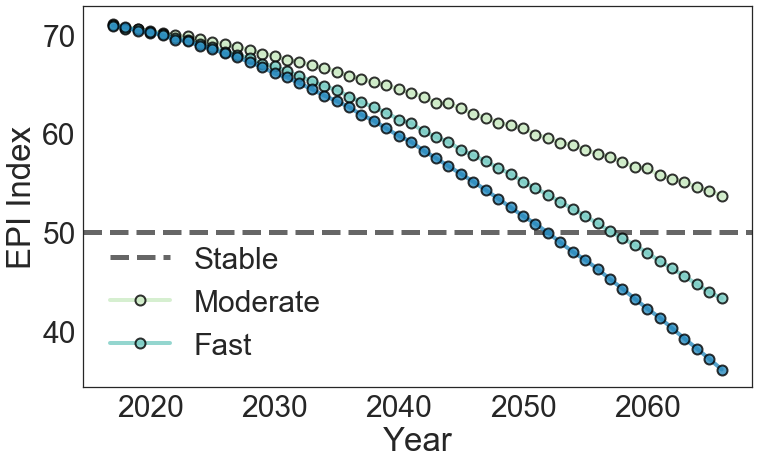

In [245]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)
plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.plot(years,epi_future['0.0'],'o-',linewidth=linewidth, c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,epi_future['0.3'],'o-',linewidth=linewidth, c=pal[1],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,epi_future['0.5'],'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)

plt.xlabel('Year')
plt.ylabel(r'EPI Index')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.legend(['Stable','Moderate','Fast'])

plt.savefig('epi_future.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/epi_future.pdf',bbox_inches='tight')
plt.show()

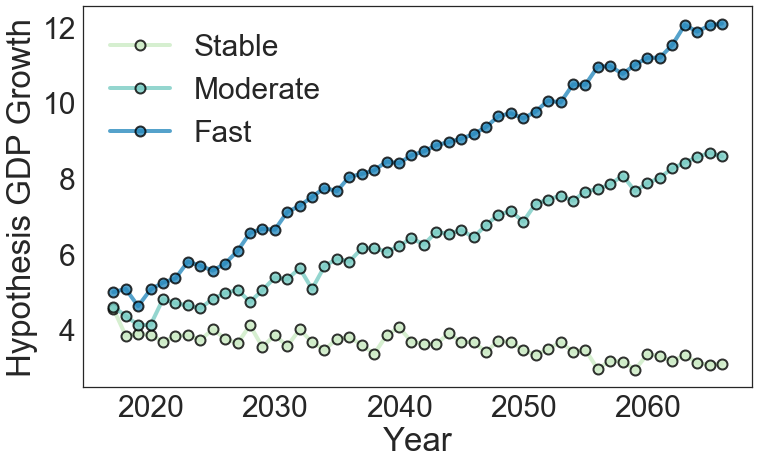

In [246]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)
plt.plot(years,gdp_growth_future['0.0'],'o-',linewidth=linewidth, c=pal[0],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,gdp_growth_future['0.3'],'o-',linewidth=linewidth, c=pal[1],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(years,gdp_growth_future['0.5'],'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)

plt.xlabel('Year')
plt.ylabel(r'Hypothesis GDP Growth')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
#plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

plt.legend(['Stable','Moderate','Fast'])

plt.savefig('gdp_growth_future.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/gdp_growth_future.pdf',bbox_inches='tight')
plt.show()

In [247]:
betas = [float(x) for x in tradeoff.columns]
alphas = [float(x) for x in tradeoff.index]

In [248]:
alphas_min = []
betas_success = []
success=False
for b in betas:
    tuned = tradeoff[str(b)]
    for i,x in enumerate(tuned):
        if x >= 51:
            alphas_min.append(i)
            success=True
            break
    if success:
        betas_success.append(b)
        success=False

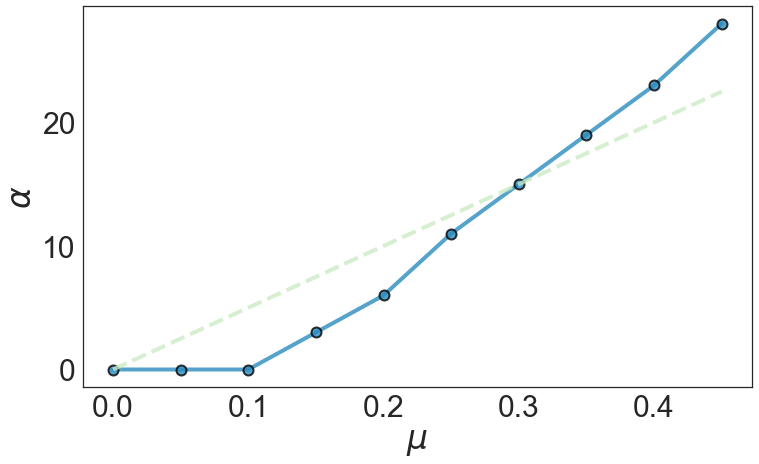

In [267]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)

plt.plot(betas_success, alphas_min,'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.plot(betas_success, np.array(betas_success)*50, '--', linewidth=linewidth, c=pal[0], markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\alpha$')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
#plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

#plt.legend(['Stable','Moderate','Fast'])

plt.savefig('tradeoff.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/tradeoff.pdf',bbox_inches='tight')
plt.show()

In [259]:
tradeoff

,0.0,0.05,0.1,0.15000000000000002,0.2,0.25,0.30000000000000004,0.35000000000000003,0.4,0.45,0.5
0,54.949883,52.875309,51.138067,49.332532,46.918414,45.306876,43.421672,41.523840,40.079527,37.426601,36.114018
1,55.856141,54.166081,52.453525,50.207140,47.938112,45.922663,43.784217,41.980181,40.413874,38.506008,36.978799
2,56.956920,55.338014,52.986988,50.885607,48.842786,46.324349,44.480673,42.878110,40.308090,39.525367,36.988798
3,57.449710,55.705567,53.517371,51.150316,48.406924,47.048865,44.960603,43.319106,40.801452,38.724747,37.405208
4,58.832110,56.887317,54.507765,51.606655,50.039517,47.230216,45.207076,43.703416,41.390491,39.496239,37.060382
5,59.618310,57.295021,55.199020,52.562605,50.166367,47.294116,45.948690,44.076090,41.772011,40.365744,38.550036
6,59.563952,58.120893,55.803284,53.635518,51.467853,48.057185,46.792377,44.440606,42.658952,40.617642,38.981330
7,60.769910,58.980496,55.746837,54.028928,52.537175,49.796810,47.410998,44.442941,42.868827,41.449351,38.640559
8,61.169601,59.605106,57.560832,54.314960,51.634640,50.661267,47.224349,46.026309,43.451939,41.757686,39.617719
9,61.423377,60.189389,57.984751,54.966472,52.006806,50.276903,48.875663,45.869082,44.964099,41.912145,39.878435


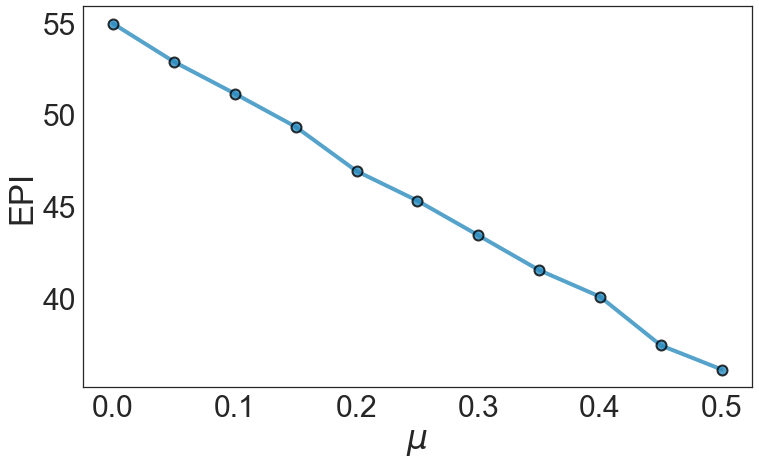

In [269]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)

plt.plot(betas, tradeoff.loc[0,:],'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.xlabel(r'$\mu$')
plt.ylabel(r'EPI')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
#plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

#plt.legend(['Stable','Moderate','Fast'])

plt.savefig('muepi.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/muepi.pdf',bbox_inches='tight')
plt.show()

In [273]:
betas_success
alphas_min

[0, 0, 0, 3, 6, 11, 15, 19, 23, 28]

In [275]:
costs = [0.0,
 -14985580313626.279,
 -29971160627252.559,
 -22520159808294.891,
 -15069158989337.207,
 7339562584676.4463,
 22269423781162.102,
 37199284977647.773,
 52129146174133.438,
 74537867748147.094]

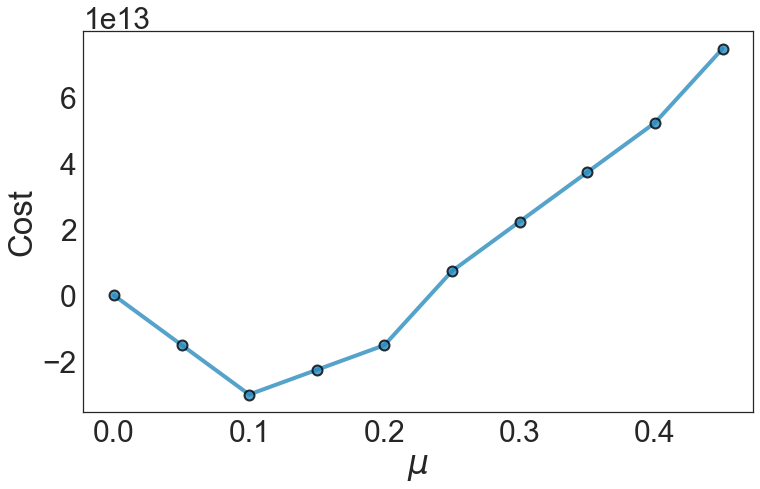

In [276]:
plt.figure(figsize=(12,7))
sns.set(style='white',font_scale=3)

plt.plot(betas_success, costs,'o-',linewidth=linewidth, c=pal[2],markeredgecolor='k', markeredgewidth=markeredgewidth,markersize=markersize,alpha=alpha)
plt.xlabel(r'$\mu$')
plt.ylabel(r'Cost')
#plt.axvline(80,c='k',linestyle='--',linewidth=5,alpha=0.6)
#plt.axhline(50,c='k',linestyle='--',linewidth=5,alpha=0.6)

#plt.legend(['Stable','Moderate','Fast'])

plt.savefig('mucost.pdf',bbox_inches='tight')
plt.savefig('../Paper/figs/mucost.pdf',bbox_inches='tight')
plt.show()

In [280]:
alphas_min,betas_success,costs

([0, 0, 0, 3, 6, 11, 15, 19, 23, 28],
 [0.0,
  0.05,
  0.1,
  0.15000000000000002,
  0.2,
  0.25,
  0.30000000000000004,
  0.35000000000000003,
  0.4,
  0.45],
 [0.0,
  -14985580313626.28,
  -29971160627252.56,
  -22520159808294.89,
  -15069158989337.207,
  7339562584676.446,
  22269423781162.1,
  37199284977647.77,
  52129146174133.44,
  74537867748147.1])